# Números Aleatorios desde la perspectiva `computacional`

### Introducción

En el caso particular de la mecánica estadística, usamos variables aleatorias para estudiar procesos estocásticos. Los números aleatorios desde la perspectiva computacional serán útiles para, por ejemplo:
- Simular sistemas cuya dinámica es inherentemente aleatoria (pensemos en fluctuaciones térmicas y ruido)
- **Aproximar probabilidades de eventos y/o valores de expectación cuando las soluciones analíticas son imprácticas o imposibles de obtener**
- Visualizar y estudiar distribuciones de probabilidad de forma empírica
- Construir modelos computacionales de fenómenos aleatorios

### Proceso estocástico
**Def.:** Nos referimos a un proceso estocástico cuando alguna cantidad física que varía con respecto a un parámetro (usualmente el tiempo) se modela mediante una variable aleatoria.

Ejemplos:
- En la teoría moderna, un sistema cuántico en general sometido a efectos externos se modela mediante un proceso estocástico
- Movimiento Browniano (movimiento de partículas heterogéneas en un fluido)
- Procesos biológicos (e.g., el movimiento de un ente dentro de una célula, población bacteriana)
- Caminos aleatorios (mas de esto mas adelante en el curso)
- Procesos de Markov (mas de esto mas adelante en el curso)

El poder de utilizar teorías de procesos estocásticos no es solamente relevante cuando la dinámica interna es aleatoria, si no también en casos donde la dinámica interna del proceso es **inherentemente determinística**.
Por ejemplo, en el caso del movimiento Browniano la dinámica de una partícula en un fluido se puede entender desde primeros principios usando las cantidades microscópicas del sistema (conociendo interacciones, posiciones, masas, etc); sin embargo, esto puede ser un problema intratable. En su lugar, suponemos que el comportamiento sigue un proceso estocástico para hacer predicciones.

### Números pseudoaleatorios

El uso de verdaderos números aleatorios es **impráctico** desde el punto de vista computacional.
Esto se debe a que:
- Los números aleatorios son muy costosos y difíciles de generar y manipular (una computadora clásica no puede generarlos),
- no existe una forma rápida ni escalable de generarlos y
- es complicado o impráctico generarlos bajo alguna distribución de probabilidad conocida.

Por esta razón, usamos números **pseudoaleatorios**; los cuales, en principio, deben seguir las siguientes propiedades:
* El número que sigue en una secuencia no puede predecirse
* Existe una forma rápida de generarlos
* El periodo es muy largo (recordemos que computacionalmente hablando, solamente podemos trabajar con espacios finitos)
* No existen correlaciones estadísticas entre ellos
* Es reproducible
* Superan pruebas de aleatoriedad (existe un zoológico de estas pruebas que se pueden aplicar)

La tarea al generar números pseudoaleatorios corresponde a **utilizar algoritmos determinísticos que producen secuencias de números que se comportan, desde la perspectiva estadística, como números verdaderamente aleatorios**

### Generación de números pseudoaleatorios

#### Generador lineal congruente (*LCG*)

Una de las formas más fundamentales de generar números pseudoaleatorios corresponde al generador lineal congruente (Thompson & Rotenberg 1958). La secuencia de números se basa en la siguiente regla determinística:
* $x_{i+1} = (ax_i + c) \mod m$, donde $\rm{mod}$ es la operación de división residual
  - En `Python`, dicha operación se escribe `x[i+1] = (a*x[i] + c) % m`
* $a, c$ y $m$ son constantes y números enteros
* $x_0$ se conoce como el valor de inicialización (seed) y $m$ es un número entero. Generalmente, se escoge $m >> 1$, este valor determina el periodo de la secuencia
  - La calidad de las secuencias generadas por el generador lineal congruente es muy sensible a la escogencia de los parámetros
  - Se suelen buscar estos parámetros de forma empírica para satisfacer pruebas de aleatoriedad

El generador lineal congruente funciona **relativamente bien** con una escogencia **apropiada** de sus **parámetros**, e increiblemente **mal** si estos **parámetros no se escogen bien**.

#### Implementación del LCG

En `Python`, la implementación es muy sencilla. Veamos:

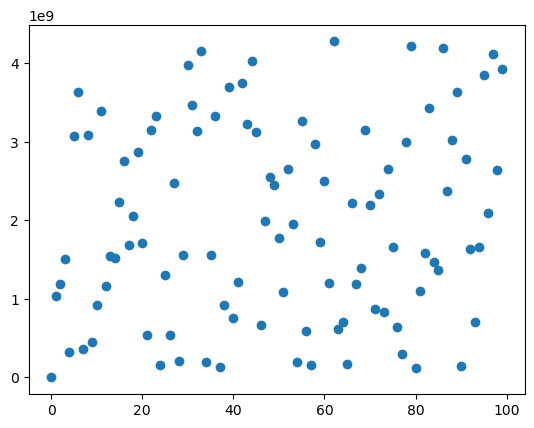

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lcg(N, seed = 11):
    a = 1664525
    c = 1013904223
    m = 4294967296
    sequence = np.zeros(N)
    sequence[0] = seed
    for i in range(1, N):
        sequence[i] = (a * sequence[i - 1] + c) % m
        
    return sequence

seq = lcg(100)
plt.plot(seq, 'o')
plt.show()

Note que la secuencia solo genera números enteros, pero se pueden rescalar de forma muy sencilla para generar números en **cualquier rango de valores**.

* Ventajas:
  - Reproducible
  - Extremadamente sencillo de implementar
  - Periodos *relativamente* largos
* Desventaja:
  - La calidad de la secuencia es muy sensible al valor de inicialización y a los parámetros escogidos

#### Generador Mersenne-Twister

El generador Mersenne-Twister (Matsumoto & Nishimura 1997) es uno de los generadores mas ampliamente utilizados en simulaciones de sistemas físicos. Una de las razones mas importantes de por qué este es el caso se debe a su **robusta capacidad de aprobar distintas pruebas de aleatoriedad** y a su **largo periodo**.
- La secuencia posee un periodo de $2^{19937} - 1$
- La base del algoritmo depende de un espacio 624-dimensional y usa una transformación de rotación (*twist*) para alcanzar una distribución uniforme
- Sumamente eficiente para simulaciones de gran escala y con propiedades de aleatoriedad de alta calidad
- Adoptado en ambientes de computación científica  

#### Implementación Mersenne-Twister

La implementación del algoritmo Mersenne-Twister es bastante compleja. Sin embargo, podemos adoptar la implementación de `NumPy`, la cual tiene la ventaja que utiliza código compilado en su `backend`.

En versiones previas a `NumPy 1.17`, el generador Mersenne-Twister era el generador por defecto. En nuevas versiones se utiliza un generador distinto. Para accesar el generador Mersenne-Twister se debe invocar el `constructor` del generador `MT19937`:

In [20]:
# Se crea una instancia del motor del generador:
from numpy.random import Generator, MT19937

rng_mt = Generator(MT19937(seed = 42))

Para generar una secuencia uniforme en el intervalo [0, 1):

In [21]:
print(rng_mt.random(3))

[0.54199389 0.61966721 0.05736978]


De la misma forma, se pueden generar números enteros usando:

In [22]:
print(rng_mt.integers(0, 10, 5))

[8 3 8 8 6]


A su vez, se pueden generar números que sigan alguna distribución de probabilidad determinada.

#### Generador congruente permutado (*PCG*)

En nuevas implementaciones del generador de números aleatorios de `NumPy` (versiones $\geq 1.17$) se utiliza el generador congruente permutado de `64 bits` (O'Neill 2014). 

- EL PCG se considera igual de robusto a nivel estadístico que el generador Mersenne-Twister
- El periodo de la secuencia máxima es de $2^{128}$ para el caso del generador de `64 bits`
- Mejor soporte para cálculos en paralelo

#### Implementación del PCG (64 bits)

El PCG es ahora el generador por defecto usado en `NumPy`. Esto implica que se puede invocar usando la `API` usual (https://numpy.org/doc/stable/reference/random/index.html):

In [26]:
seq = np.random.uniform(0, 1, size = 5)

print(seq)

[0.34010823 0.96275925 0.05642637 0.12538234 0.69292162]


#### Ejercicio: Comparación de los algoritmos Mersenne-Twister y PCG

Deseamos poner en comparación el algoritmo PCG frente al Mersenne-Twister. Realicemos una prueba primero una prueba estadística básica:

In [27]:
import numpy as np
from numpy.random import Generator, PCG64, MT19937

# Primero construimos los objetos de los generadores
rng_pcg = Generator(PCG64(seed=42))
rng_mt = Generator(MT19937(seed=42))

# Luego generamos dos secuencias:
data_pcg = rng_pcg.random(1000)
data_mt = rng_mt.random(1000)

# Y calculamos el promedio y la desviación estándar:
mean_pcg = np.mean(data_pcg)
std_pcg = np.std(data_pcg)
mean_mt = np.mean(data_mt)
std_mt = np.std(data_mt)

print("PCG64 statistics:")
print(f"  Mean: {mean_pcg:.6f}, Standard Deviation: {std_pcg:.6f}")

print("MT19937 statistics:")
print(f"  Mean: {mean_mt:.6f}, Standard Deviation: {std_mt:.6f}")

PCG64 statistics:
  Mean: 0.497178, Standard Deviation: 0.291440
MT19937 statistics:
  Mean: 0.503389, Standard Deviation: 0.292014


Note que el promedio es cercano a $1/2$ como es de esperarse para una distribución uniforme mientras que la desviación estándar esperada también es la correcta ($1 / \sqrt{12}$, mas de esto mas adelante)

En particular, una ventaja de usar el PCG en lugar de Mersenne-Twister se debe a que su implementación es más sencilla y más eficiente.

Comprobemos si este es el caso al generar una lista de números pseudoaleatorios mas grande:

In [35]:
import time

# Números de la secuencia
# Puede probar distintos tamaños de la secuencia:
N = 1_000_000_000

# Tiempos PCG
# Se debe restablecer la semilla cada vez que se genera una secuencia si se desea reproducir,
# esto se debe que generar una lista cambia el "estado" del sistema
rng_pcg = Generator(PCG64(seed=42))
start_time = time.time()
data_pcg = rng_pcg.integers(low = 0, high = 10, size = N)
pcg_time = time.time() - start_time
# Tiempos Mersenne-Twister
rng_mt = Generator(MT19937(seed=42))
start_time = time.time()
data_mt = rng_mt.integers(low = 0, high = 10, size = N)
mt_time = time.time() - start_time

print(f"Time for PCG64 to generate {N} random numbers: {pcg_time:.4f} seconds")
print(f"Time for MT19937 to generate {N} random numbers: {mt_time:.4f} seconds")

Time for PCG64 to generate 1000000000 random numbers: 2.6248 seconds
Time for MT19937 to generate 1000000000 random numbers: 3.2216 seconds


La eficiencia es similar. Note que en este caso estamos generando números enteros. Al generar números flotantes la eficiencia también debería ser similar. La eficiencia, en general, depende del `backend` instalado con `NumPy`.

La ventaja del algoritmo PCG se debe a la simplicidad de su implementación y el soporte a la computación en paralelo, ya que los estados internos son mas sencillos para este tipo de procesamiento.

### Aplicaciones: Integración de Monte Carlo

Una de las aplicaciones más básicas del uso de números pseudoaleatorios es el cálculo de integrales.

Sea $g(x)$ una función continua. Deseamos encontrar 
$$
\theta = \int_{0}^{1} {\textrm{d}x}\;g(x).
$$
La idea para calcular $\theta$ corresponde a sustituir la integral por un **valor de expectación con base en una distribución de probababilidad (veremos este concepto formalmente en la próxima clase)**.
De momento, basta decir que 
$$
\theta = E[g(U)],
$$
donde $U$ es una variable aleatoria distribuida uniformemente tal que $U \in (0, 1)$. Si tenemos $N$ de estas variables $U_1, \cdots, U_N$ distribuidas de forma idéntica y y uniforme (más de esto en la próxima clase); se satisface que 
$$
\sum_{i = 1}^{N} \frac{g(U_i)}{N} \to E[g(U)] = \theta \quad {\textrm{cuando}}\; N \to \infty.
$$
El poder de esta metodología yace en que la generalización a integrales multidimensionales es muy sencilla. En estos casos, tenemos
$$
\theta = \int_{0}^{1} \int_{0}^{1} \cdots \int_{0}^{1} {\textrm{d}x_1}\cdots{\textrm{d}x_n}\; g(x_1, \cdots, x_n) = E[g(U_1, \cdots, U_n] = \sum_{i = 1}^{N} \frac{g(U_1^i, \cdots, U_n^i)}{N}.
$$
Se debe asumir que las variables aleatorias están uniforme e identicamente distribuidas.

### Implementación

Para implementar este método podemos usar números pseudoaleatorios generados de una distribución uniforme. Utilicemos el método para resolver
$$
\theta = \int_{0}^{1} \int_{0}^{1} {\textrm{d}x} {\textrm{d}y}\; e^{-(x^2 + y^2)} \cos(5xy)
$$
Note que a pesar de que esta integral contiene funciones continuas, no posee una antiderivada con una forma cerrada elemental.

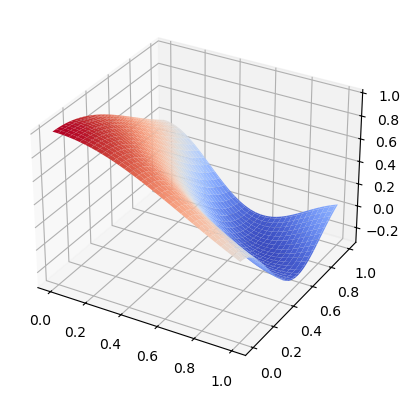

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la función g(x_1, x_2)
funcG = lambda x1, x2: np.exp(-1.0 * ((x1 * x1) + (x2 * x2))) * np.cos(5.0 * x1 * x2)

xVals = np.linspace(0, 1, 101)
yVals = np.linspace(0, 1, 101)
X, Y = np.meshgrid(xVals, yVals)
Z = funcG(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm');

Para la solución usando Monte Carlo, debemos generar una lista de $N$ números pseudoaleatorios **por cada variable independiente** (la dimensión $d$ de la función a integrar). En este caso, tenemos $d = 2$. Luego, tenemos que calcular el valor de expectación. Empecemos por definir una función que estima el valor de expectación.

No es complicado generalizar una función para evaluar el valor de expectación para un valor $d$ en general, dependiendo de la estructura de datos; sin embargo, mantengamos la implementación sencilla y escribamos una función que evalúa el caso particular $d = 2$:

In [36]:
def exptValue2(func, nVal, rng):
    x1 = rng.random(nVal)
    x2 = rng.random(nVal)
    gx = func(x1, x2)

    return np.mean(gx)

Ahora usamos esta función para estimar la integral para distintos valores de $N$:

In [37]:
rng = np.random.default_rng(seed = 11)

nVals = np.logspace(start = 2, stop = 26, num = 20, base = 2).astype(int)
print(nVals)
estimatesGXY = np.zeros(nVals.size)
for nn in range(nVals.size):
    estimatesGXY[nn] = exptValue2(funcG, nVals[nn], rng)

[       4        9       23       55      132      318      764     1835
     4406    10575    25383    60924   146231   350985   842437  2022023
  4853272 11648850 27959633 67108864]


Y ahora visualizamos el resultado:

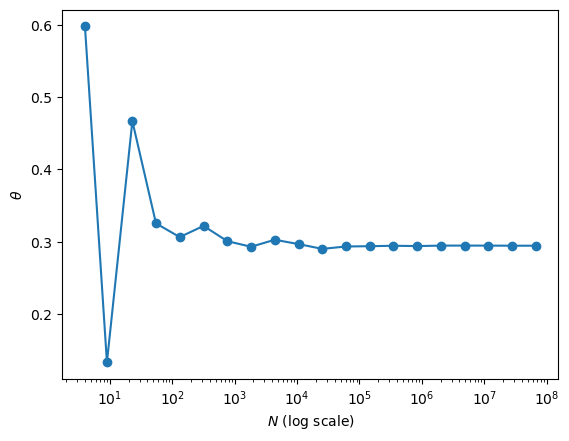

In [38]:
plt.xscale('log')
plt.xlabel("$N$ (log scale)")
plt.ylabel(r"$\theta$")
plt.plot(nVals, estimatesGXY, '-o');

Note que el resultado converge conforme $N \to \infty$. 

Es interesante estudiar como escala el error conforme $N \to \infty$. Tomemos un valor de aproximación para $N$ muy grande y asumamos que ese valor es el valor correcto de $\theta$. Podemos evaluar el error relativo como función de $N$ usando
$$
\textrm{Error}[\theta(N)] = \frac{|\theta - \theta(N)|}{\theta}.
$$
Veamos:

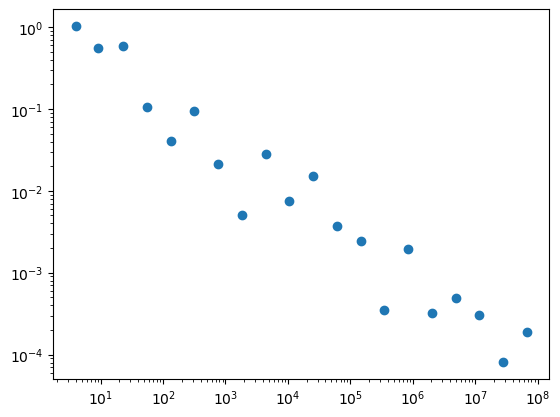

In [39]:
# Este valor sigue siendo una aproximación. Asumamos que equivale al valor correcto solo para estimar el error relativo:
trueVal = exptValue2(funcG, 10**8, rng) 

# Ahora construimos un vector para el error:
errorEstimate = np.abs(trueVal - estimatesGXY) / trueVal

plt.xscale('log')
plt.yscale('log')
plt.plot(nVals, errorEstimate, 'o');

El resultado escala de forma lineal (con fluctuciones) en la escala logarítmica. Esto implica un comportamiento de ley de potencia. De hecho,
$$
\textrm{Error} \propto N^{-1/2}.
$$
Esto es un resultado importante que investigaremos más adelante. Veamos:

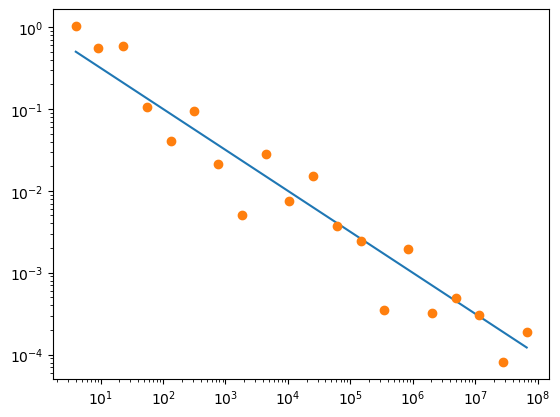

In [40]:
pot2 = lambda n: np.pow(n, -0.5)

plt.xscale('log')
plt.yscale('log')
plt.plot(nVals, pot2(nVals));
plt.plot(nVals, errorEstimate, 'o');

### Ejercicio

Utilice el método de Monte Carlo estudiado anteriormente para evaluar la integral 
$$
\theta = \int_{0}^{\infty} {\textrm{d}x} \frac{\ln(1 + x)}{1 + x^2}.
$$
Identifique alguna forma de lidiar con la integral impropia y evalúe posibles complicaciones.

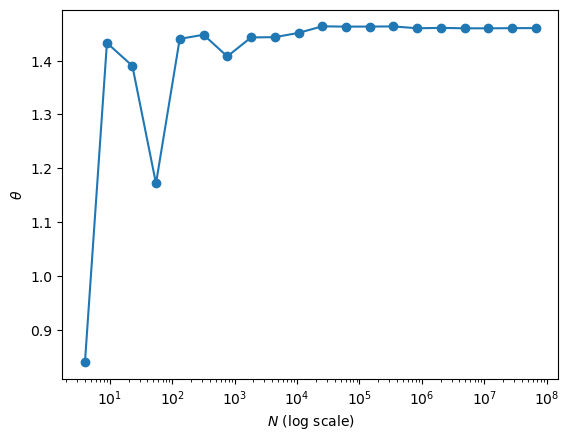

In [93]:
def exptValue2(func, nVal, rng):
    x1 = rng.random(nVal)
    gx = func(x1)

    return np.mean(gx)

# F(X)
fx = lambda x: np.log(1 + x)  / (1 + x**2)

ft = lambda t: (1 / (1 - t)**2) * fx(t / (1 - t))

rng = np.random.default_rng(seed = 11)

estimatesGXY = np.zeros(nVals.size)
for nn in range(nVals.size):
    estimatesGXY[nn] = exptValue2(ft, nVals[nn], rng)

plt.xscale('log')
plt.xlabel("$N$ (log scale)")
plt.ylabel(r"$\theta$")
plt.plot(nVals, estimatesGXY, '-o');

In [92]:
estimatesGXY[-1]

np.float64(1.460439832295512)